# CAPSTONE PROJECT SUBMISSION


*   Student name: Phillip Ojo
*   Student pace: part time
* Scheduled project review date/time:
* Instructor name: Amber Yandow
* Blog post URL:



# INTRODUCTION

Everybody loves to travel or atleast dreams of it, but the fear of spending a gross amount of time sitting and planning a trip keeps us sitting on the couch and not out traveling the world. We must go through and budget every hotel, attraction, resturant and hope to find something similar to our likes that we want to do. The entire process is extremely tedious. 

Pouplar travel tends that have been trending in the market are:

**Weekend Getaways:** This is for the short-term travelers which still want an authentic experience that are personal, rewarding and tailored to their interests.

**Bleisure Travel:** This is for the travelers that visit a location for business and extend it for liesure. 

**Insta-Tourism:** This is for the travelers that want to formulate a trip on photogenic spot that are instagram worthy. 

**Romantic Getaways:** This is for the travelers that what to grab there partner and hit the road to adventure.



## Goal:
Our intellgent travel recomendations system will provide the user details and prefrencences on the most popular attractions in various loactions based on the type of travel class you fall under. This project will be the one-stop tool for travelers planning their vacations, we achive the same using Data Science tolls and techniques which will be explained in detail.

# DATA

# OBTAIN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import itertools
import os
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact
from ipywidgets import HBox, VBox
from ipywidgets import Layout, widgets
from IPython.display import display, IFrame, HTML
from collections import Counter
%matplotlib inline
from scipy import sparse

#SKLEARN PACKAGE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

# sklearn imports
from sklearn.model_selection import train_test_split

# keras/tensorflow imports
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Multiply, Concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adagrad, Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
#Load the data

#from google.colab import drive
#drive.mount('/content/drive', force_remount= True)

## Selenium Webdirver

WebDriver drives a browser natively, as a user would, either locally or on a remote machine using the Selenium server, marks a leap forward in terms of browser automation. This tool was used to web scrap the diffrent attractions and differnt destination. I chose this route because if i wanted you use the traditional Beautiful Soup webscraping technique, i would have to genrate all the diffrent urls and it would have been time costly. 

For more information, access [link text](https://selenium-python.readthedocs.io/) 

## Code that was used to webscrap Trip Advisor website





```
for city in city_recomendations:

    
    #Open Driver
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get(url)

    time.sleep(7)

    #Diffrent Location Inputs
    driver.find_element_by_xpath('//*[@id="lithium-root"]/main/div[3]/div/div/div[2]/div[2]/div[2]/form/input[1]').send_keys(city)


    #Select first name on list
    driver.find_element_by_xpath('//*[@id="lithium-root"]/main/div[3]/div/div/div[2]/div[2]/div[2]/form/input[1]').send_keys(Keys.ENTER)

    time.sleep(2)

    #Slect First name on list
    driver.find_element_by_xpath("//*[@id='BODY_BLOCK_JQUERY_REFLOW']/div[2]/div/div[2]/div/div/div/div/div[1]/div/div[1]/div/div[3]/div/div[1]/div/div[2]/div/div/div/div/div/div/div[2]/div[1]/div[1]").click()

    time.sleep(5)

    handles = driver.window_handles

    if len(handles) == 1:

        pass

    else: 
    
        if driver.current_window_handle == handles[0]:
            driver.close()
    
    handles = driver.window_handles
    driver.switch_to_window(handles[0])

    #Handle Pop Ups

    try:
        driver.find_element_by_xpath('/html/body/div[3]/div[3]/div/div[1]/div/button').click()
    except:

        pass
    
    try: 
        driver.find_element_by_xpath("//*[text()= 'Things to Do']").click()
    
        handles = driver.window_handles
        if len(handles) > 1:
            driver.switch_to_window(handles[1])
            if driver.current_window_handle == handles[0]:
                driver.close()

    

    except:

        driver.find_element_by_xpath("//*[text()= 'Things to Do']").click()

    time.sleep(7)

    #Load the Top 30 Attractions (Dynamic page so the buttons could apprear diffrent each time)
    try:
        driver.find_element_by_xpath('//*[@id="lithium-root"]/main/div/div[1]/div/div/div[2]/div/span/div[2]/div[2]/div/section[4]/div/div/span/div/div[3]/div/button').click()
     
    except:
    
        pass 
    
    try:
        driver.find_element_by_xpath('//*[@id="lithium-root"]/main/div[6]/div/div/div/div[6]/div[3]').click()
    except:
    
        pass

    
    time.sleep(4)
    
    
    #Gather all the diffrent Attractions per city
    attractions = driver.find_elements_by_class_name('_1cD4PtKq')

    if len(attractions) <= 1:
        attractions = driver.find_elements_by_class_name('_255i5rcQ')
    
            
    else: 
            
        pass
      

    #Store the current hanldes due to pop up window

    current_handles = driver.window_handles
    driver.switch_to_window(current_handles[0])


    for attrs in attractions:
        
                time.sleep(2)

                attrs.click()

                time.sleep(4)

                current_handles = driver.window_handles
                time.sleep(2)
        
                driver.switch_to_window(current_handles[1])

                time.sleep(4)

                try:

                    attraction = driver.find_element_by_xpath('//*[@id="HEADING"]').text
                except:
                    pass

                try:

                    rank = driver.find_element_by_tag_name('b').text.strip('#')
                except:
                    pass

                try:

                    num_review = driver.find_element_by_xpath('//*[@id="REVIEWS"]/div/span[1]/span[2]/span[1]').text.strip(",,Reviews").replace(",","")
                except:
                    pass

                try:
                        rating = driver.find_element_by_class_name('_2Hy7Xxdm').text
                except:
                        pass

                try:

                    address = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[2]/div[9]/div/div/div[2]/div[1]/div[2]/div[2]/div[1]/span[2]').text
                except:
                    pass


                try:

                    label = driver.find_element_by_class_name('_3RTCF0T0').text
                except:
                    pass


                f.write(attraction + "," + address.replace(",", "|") + "," + rank + "," + rating + "," + num_review.strip(',') + "," + label.replace(",", "|") + "\n")

        
                driver.close()
                time.sleep(2)
                driver.switch_to_window(current_handles[0])
    
    driver.quit()
```



## Load in Data

**This project will utilize a mixture of text and numerical data. The feature that will be analyzed the most is the Rating and Overview Column.**


In [3]:
df_1= pd.read_csv('Bleisure (1).csv')
df_2 = pd.read_csv('Instagram (1).csv')
df_3 = pd.read_csv('Romantic.csv')
df_4 = pd.read_csv('Weekend1 - Weekend1.csv')

all_df = [df_1,df_2,df_3,df_4]


attrac_df = pd.concat(all_df)
attrac_df.head()

,Address,Attraction,Label,Number_of_Reviews,Overview,Rank,Rating,Type,Unnamed: 8
0,NaN,USS Midway Museum,Specialty Museums,NaN,Located in downtown San Diego| the USS Midway ...,1,NaN,Bleisure,NaN
1,1100 Coast Blvd| La Jolla| San Diego| CA 92037...,La Jolla Cove,Beaches| Parks,13458.0,San Diego's most desirable spot for swimming| ...,1,4.5,Bleisure,NaN
2,2929 Zoo Drive Balboa Park| San Diego| CA 92101,San Diego Zoo,Zoos,27747.0,The world famous San Diego Zoo is a non-profit...,4,4.5,Bleisure,NaN
3,6905 La Jolla Scenic Drive South| La Jolla| Sa...,Mt. Soledad National Veterans Memorial,Historic Sites| Points of Interest & Landmarks...,2448.0,Mt. Soledad National Veterans Memorial,2,None,Bleisure,NaN
4,1549 El Prado| San Diego| CA 92101-1660,Balboa Park,Parks| Gardens| Playgrounds,12855.0,One of the most popular urban parks in the Uni...,3,4.5,Bleisure,NaN


In [4]:
attrac_df.columns

Index(['Address', 'Attraction', 'Label', 'Number_of_Reviews', 'Overview',
       'Rank', 'Rating', 'Type', 'Unnamed: 8'],
      dtype='object')

In [5]:
#Drop the Unnamed Coloumn
attrac_df.drop(columns='Unnamed: 8')

,Address,Attraction,Label,Number_of_Reviews,Overview,Rank,Rating,Type
0,NaN,USS Midway Museum,Specialty Museums,NaN,Located in downtown San Diego| the USS Midway ...,1,NaN,Bleisure
1,1100 Coast Blvd| La Jolla| San Diego| CA 92037...,La Jolla Cove,Beaches| Parks,13458.0,San Diego's most desirable spot for swimming| ...,1,4.5,Bleisure
2,2929 Zoo Drive Balboa Park| San Diego| CA 92101,San Diego Zoo,Zoos,27747.0,The world famous San Diego Zoo is a non-profit...,4,4.5,Bleisure
3,6905 La Jolla Scenic Drive South| La Jolla| Sa...,Mt. Soledad National Veterans Memorial,Historic Sites| Points of Interest & Landmarks...,2448.0,Mt. Soledad National Veterans Memorial,2,None,Bleisure
4,1549 El Prado| San Diego| CA 92101-1660,Balboa Park,Parks| Gardens| Playgrounds,12855.0,One of the most popular urban parks in the Uni...,3,4.5,Bleisure
...,...,...,...,...,...,...,...,...
254,97 Haywood St| Asheville| NC 28801-2852,Basilica of Saint Lawrence,Churches & Cathedrals,1184.0,Basilica of Saint Lawrence,11,4.5,Weekend Getaway
255,81 S Lexington Ave| Asheville| NC 28801-3309,Lexington Glassworks,Art Galleries,944.0,Lexington Glassworks| located in the heart of ...,6,4.5,Weekend Getaway
256,Milepost 382 Blue Ridge Parkway Southern Highl...,The Folk Art Center (Southern Highland Craft G...,Specialty Museums| Libraries,1357.0,Traditional and contemporary Southern Appalach...,9,4.5,Weekend Getaway
257,75 Gashes Creek Rd| Asheville| NC 28805-2529,Western North Carolina Nature Center,Zoos| Other Nature & Parks,760.0,Visit the Western North Carolina Nature Center...,18,4.5,Weekend Getaway


In [6]:
#Make the Label coloumn into a list
attrac_df['Label']= attrac_df['Label'].str.split('|')

In [7]:
attrac_df['Label'][0]

0                            [Specialty Museums]
0                              [Caverns & Caves]
0               [Points of Interest & Landmarks]
0    [Natural History Museums,  Science Museums]
Name: Label, dtype: object

In [8]:
attrac_df.reset_index(inplace = True)
attrac_df

,index,Address,Attraction,Label,Number_of_Reviews,Overview,Rank,Rating,Type,Unnamed: 8
0,0,NaN,USS Midway Museum,[Specialty Museums],NaN,Located in downtown San Diego| the USS Midway ...,1,NaN,Bleisure,NaN
1,1,1100 Coast Blvd| La Jolla| San Diego| CA 92037...,La Jolla Cove,"[Beaches, Parks]",13458.0,San Diego's most desirable spot for swimming| ...,1,4.5,Bleisure,NaN
2,2,2929 Zoo Drive Balboa Park| San Diego| CA 92101,San Diego Zoo,[Zoos],27747.0,The world famous San Diego Zoo is a non-profit...,4,4.5,Bleisure,NaN
3,3,6905 La Jolla Scenic Drive South| La Jolla| Sa...,Mt. Soledad National Veterans Memorial,"[Historic Sites, Points of Interest & Landmar...",2448.0,Mt. Soledad National Veterans Memorial,2,None,Bleisure,NaN
4,4,1549 El Prado| San Diego| CA 92101-1660,Balboa Park,"[Parks, Gardens, Playgrounds]",12855.0,One of the most popular urban parks in the Uni...,3,4.5,Bleisure,NaN
...,...,...,...,...,...,...,...,...,...,...
1111,254,97 Haywood St| Asheville| NC 28801-2852,Basilica of Saint Lawrence,[Churches & Cathedrals],1184.0,Basilica of Saint Lawrence,11,4.5,Weekend Getaway,NaN
1112,255,81 S Lexington Ave| Asheville| NC 28801-3309,Lexington Glassworks,[Art Galleries],944.0,Lexington Glassworks| located in the heart of ...,6,4.5,Weekend Getaway,NaN
1113,256,Milepost 382 Blue Ridge Parkway Southern Highl...,The Folk Art Center (Southern Highland Craft G...,"[Specialty Museums, Libraries]",1357.0,Traditional and contemporary Southern Appalach...,9,4.5,Weekend Getaway,NaN
1114,257,75 Gashes Creek Rd| Asheville| NC 28805-2529,Western North Carolina Nature Center,"[Zoos, Other Nature & Parks]",760.0,Visit the Western North Carolina Nature Center...,18,4.5,Weekend Getaway,NaN


In [9]:
attrac_df.rename(columns= {'index':'Attracid'}, inplace = True)
attrac_df

,Attracid,Address,Attraction,Label,Number_of_Reviews,Overview,Rank,Rating,Type,Unnamed: 8
0,0,NaN,USS Midway Museum,[Specialty Museums],NaN,Located in downtown San Diego| the USS Midway ...,1,NaN,Bleisure,NaN
1,1,1100 Coast Blvd| La Jolla| San Diego| CA 92037...,La Jolla Cove,"[Beaches, Parks]",13458.0,San Diego's most desirable spot for swimming| ...,1,4.5,Bleisure,NaN
2,2,2929 Zoo Drive Balboa Park| San Diego| CA 92101,San Diego Zoo,[Zoos],27747.0,The world famous San Diego Zoo is a non-profit...,4,4.5,Bleisure,NaN
3,3,6905 La Jolla Scenic Drive South| La Jolla| Sa...,Mt. Soledad National Veterans Memorial,"[Historic Sites, Points of Interest & Landmar...",2448.0,Mt. Soledad National Veterans Memorial,2,None,Bleisure,NaN
4,4,1549 El Prado| San Diego| CA 92101-1660,Balboa Park,"[Parks, Gardens, Playgrounds]",12855.0,One of the most popular urban parks in the Uni...,3,4.5,Bleisure,NaN
...,...,...,...,...,...,...,...,...,...,...
1111,254,97 Haywood St| Asheville| NC 28801-2852,Basilica of Saint Lawrence,[Churches & Cathedrals],1184.0,Basilica of Saint Lawrence,11,4.5,Weekend Getaway,NaN
1112,255,81 S Lexington Ave| Asheville| NC 28801-3309,Lexington Glassworks,[Art Galleries],944.0,Lexington Glassworks| located in the heart of ...,6,4.5,Weekend Getaway,NaN
1113,256,Milepost 382 Blue Ridge Parkway Southern Highl...,The Folk Art Center (Southern Highland Craft G...,"[Specialty Museums, Libraries]",1357.0,Traditional and contemporary Southern Appalach...,9,4.5,Weekend Getaway,NaN
1114,257,75 Gashes Creek Rd| Asheville| NC 28805-2529,Western North Carolina Nature Center,"[Zoos, Other Nature & Parks]",760.0,Visit the Western North Carolina Nature Center...,18,4.5,Weekend Getaway,NaN


We have a list of labels for certain Attaractions and we must Unstack the list into multiple rows

In [10]:
lst_col = 'Label'

In [11]:
attrac_df= pd.DataFrame({col:np.repeat(attrac_df[col].values, attrac_df[lst_col].str.len())for col in attrac_df.columns.difference([lst_col])}).assign(**{lst_col:np.concatenate(attrac_df[lst_col].values)})[attrac_df.columns.tolist()]
 

The function for this is found [link text](https://stackoverflow.com/questions/42012152/unstack-a-pandas-column-containing-lists-into-multiple-rows)

In [12]:
attrac_df

,Attracid,Address,Attraction,Label,Number_of_Reviews,Overview,Rank,Rating,Type,Unnamed: 8
0,0,NaN,USS Midway Museum,Specialty Museums,NaN,Located in downtown San Diego| the USS Midway ...,1,NaN,Bleisure,NaN
1,1,1100 Coast Blvd| La Jolla| San Diego| CA 92037...,La Jolla Cove,Beaches,13458.0,San Diego's most desirable spot for swimming| ...,1,4.5,Bleisure,NaN
2,1,1100 Coast Blvd| La Jolla| San Diego| CA 92037...,La Jolla Cove,Parks,13458.0,San Diego's most desirable spot for swimming| ...,1,4.5,Bleisure,NaN
3,2,2929 Zoo Drive Balboa Park| San Diego| CA 92101,San Diego Zoo,Zoos,27747.0,The world famous San Diego Zoo is a non-profit...,4,4.5,Bleisure,NaN
4,3,6905 La Jolla Scenic Drive South| La Jolla| Sa...,Mt. Soledad National Veterans Memorial,Historic Sites,2448.0,Mt. Soledad National Veterans Memorial,2,None,Bleisure,NaN
...,...,...,...,...,...,...,...,...,...,...
1447,257,75 Gashes Creek Rd| Asheville| NC 28805-2529,Western North Carolina Nature Center,Other Nature & Parks,760.0,Visit the Western North Carolina Nature Center...,18,4.5,Weekend Getaway,NaN
1448,258,111 Grovewood Rd Adjacent to The Omni Grove Pa...,Grovewood Village,Art Galleries,561.0,Grovewood Village is a hidden gem rich with ar...,8,4.5,Weekend Getaway,NaN
1449,258,111 Grovewood Rd Adjacent to The Omni Grove Pa...,Grovewood Village,Historic Sites,561.0,Grovewood Village is a hidden gem rich with ar...,8,4.5,Weekend Getaway,NaN
1450,258,111 Grovewood Rd Adjacent to The Omni Grove Pa...,Grovewood Village,Points of Interest & Landmarks,561.0,Grovewood Village is a hidden gem rich with ar...,8,4.5,Weekend Getaway,NaN


In [13]:
#Replace the None string with NAN
attrac_df['Rating'].replace('None', np.NaN, inplace = True)

In [14]:
attrac_df['Rating'].fillna(4, inplace = True)

In [15]:

attrac_df['Number_of_Reviews'].fillna(2418)

0        2418.0
1       13458.0
2       13458.0
3       27747.0
4        2448.0
         ...   
1447      760.0
1448      561.0
1449      561.0
1450      561.0
1451      561.0
Name: Number_of_Reviews, Length: 1452, dtype: float64

In [16]:
attrac_df['Number_of_Reviews'].isna()

0        True
1       False
2       False
3       False
4       False
        ...  
1447    False
1448    False
1449    False
1450    False
1451    False
Name: Number_of_Reviews, Length: 1452, dtype: bool

In [17]:
attrac_df['Rating'].astype(float)

0       4.0
1       4.5
2       4.5
3       4.5
4       4.0
       ... 
1447    4.5
1448    4.5
1449    4.5
1450    4.5
1451    4.5
Name: Rating, Length: 1452, dtype: float64

In [18]:
attrac_df['Rating'].unique()

array([4, '4.5', '5', '4', '6', '3.5', '1', 4.5, 5.0, 3.5], dtype=object)

In [19]:
attrac_df['Rating'] = pd.to_numeric(attrac_df['Rating'], errors= 'coerce')

In [20]:
attrac_df['Rating'].unique()

array([4. , 4.5, 5. , 6. , 3.5, 1. ])

In [21]:
#Lets Remove repeated rows
attrac_df.drop_duplicates(subset ="Attraction", keep = 'first', inplace = True)

#Data Exploration

**Popularity based recommendation system** works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.



* v is the number of votes for the movie;

*   m is the minimum votes required to be listed in the chart;
*   R is the average rating of the Attraction; 
*   C is the mean vote across the whole Attraction.



In [22]:
C= attrac_df['Rating'].mean(int())
C

4.382053654024052

In [23]:
m= attrac_df['Number_of_Reviews'].quantile(0.9)
m

3296.0000000000014

In [24]:
attrac_fea = attrac_df.copy()

In [25]:
def weighted_rating(x, m=m, C=C):
    v = x['Number_of_Reviews']
    R = x['Rating']
    # Calculation based on the formula (m=3296, c=4.382)
    return (v/(v+m) * R) + (m/(m+v) * C)

In [26]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
attrac_fea['score'] = attrac_fea.apply(weighted_rating, axis=1)
attrac_fea.head()

,Attracid,Address,Attraction,Label,Number_of_Reviews,Overview,Rank,Rating,Type,Unnamed: 8,score
0,0,NaN,USS Midway Museum,Specialty Museums,NaN,Located in downtown San Diego| the USS Midway ...,1,4.0,Bleisure,NaN,NaN
1,1,1100 Coast Blvd| La Jolla| San Diego| CA 92037...,La Jolla Cove,Beaches,13458.0,San Diego's most desirable spot for swimming| ...,1,4.5,Bleisure,NaN,4.476797
3,2,2929 Zoo Drive Balboa Park| San Diego| CA 92101,San Diego Zoo,Zoos,27747.0,The world famous San Diego Zoo is a non-profit...,4,4.5,Bleisure,NaN,4.487477
4,3,6905 La Jolla Scenic Drive South| La Jolla| Sa...,Mt. Soledad National Veterans Memorial,Historic Sites,2448.0,Mt. Soledad National Veterans Memorial,2,4.0,Bleisure,NaN,4.219229
7,4,1549 El Prado| San Diego| CA 92101-1660,Balboa Park,Parks,12855.0,One of the most popular urban parks in the Uni...,3,4.5,Bleisure,NaN,4.475930


In [27]:
#Sorting Attractions based on score calculated above
attrac_fea = attrac_fea.sort_values('score', ascending=False)


#Printing the top 15 Attractions
attrac_fea[['Attraction', 'Number_of_Reviews', 'Rating', 'score']].reset_index(drop=True).head(10)


,Attraction,Number_of_Reviews,Rating,score
0,The Metropolitan Museum of Art,54588.0,5.0,4.964813
1,Chihuly Garden and Glass,24249.0,5.0,4.926057
2,Discovery Cove,17179.0,5.0,4.900525
3,Museum of Fine Arts,8149.0,5.0,4.822040
4,Musical Instrument Museum,6320.0,5.0,4.788191
5,Cave of the Winds,6074.0,5.0,4.782631
6,Cathedral Rock,5889.0,5.0,4.778252
7,Dry Tortugas National Park,5281.0,5.0,4.762533
8,Marginal Way,5225.0,5.0,4.760973
9,Red Rock Scenic Byway (SR 179),4137.0,5.0,4.725985


Now we visulaize the top 6 Attractions according to popularity based recommender system.

Text(0.5, 1.0, 'Popular Attractions')

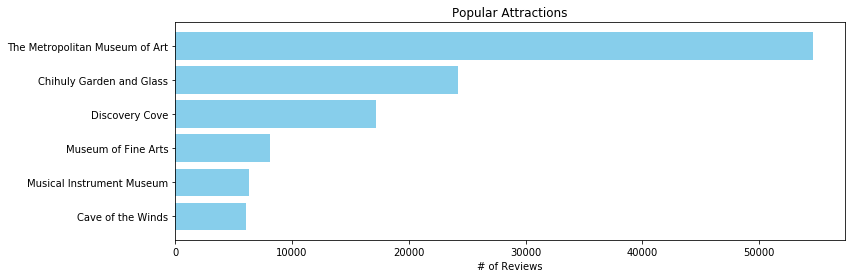

In [28]:
pop= attrac_fea.sort_values('score', ascending=False)


plt.figure(figsize=(12,4))

plt.barh(pop['Attraction'].head(6),pop['Number_of_Reviews'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("# of Reviews")
plt.title("Popular Attractions")

The Popularity based recommender provide a general chart of recommended attractions to all the users. They are not sensitive to the interests and tastes of a particular user. We must dive in a little more to get a better sense of how to recommend to the user





> **Exploratory Data Analysis**

*  Plot the counts of each rating
* Plot rating frequency of each movie








In [29]:
# get count
attrac_df_cnt = pd.DataFrame(attrac_df.groupby('Rating').size(), columns=['Number_of_Reviews'])
attrac_df_cnt

,Number_of_Reviews
Rating,
1.0,1
3.5,28
4.0,342
4.5,560
5.0,150


Text(0, 0.5, 'Number of ratings')

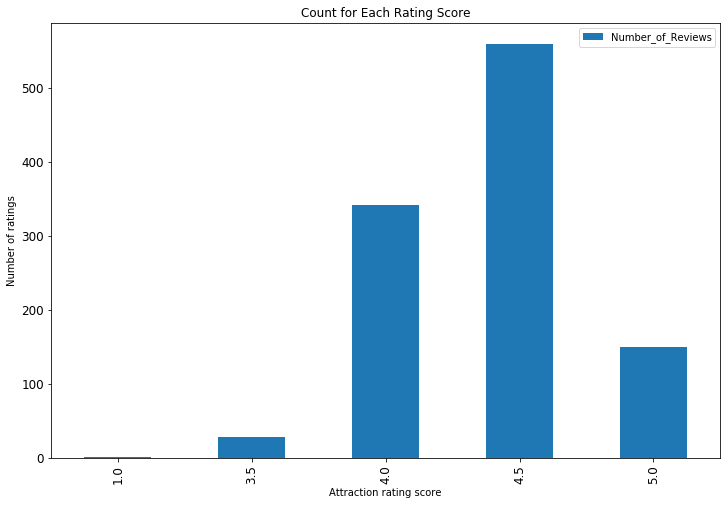

In [30]:
ax = attrac_df_cnt[['Number_of_Reviews']].reset_index().rename(columns={'index': 'Rating'}).plot(
    x='Rating',
    y='Number_of_Reviews',
    kind='bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    logy=False,
    fontsize=12,
)
ax.set_xlabel("Attraction rating score")
ax.set_ylabel("Number of ratings")

**Plot the Ratings frequency for the diffrent Attractions labels**

In [31]:
attrac_df['Label'].value_counts()

Specialty Museums                 73
Points of Interest & Landmarks    71
Wineries & Vineyards              62
Parks                             59
Historic Sites                    56
                                  ..
Lighthouses                        1
Ferries                            1
Ships                              1
Horse Tracks                       1
Bus Transportation                 1
Name: Label, Length: 100, dtype: int64

In [32]:
ratings1 = pd.DataFrame(attrac_df.groupby('Label')['Rating'].mean())
ratings1.head()


,Rating
Label,
1359,1.000000
Antique Stores,4.166667
Aquariums,4.416667
Architectural Buildings,4.428571
Arenas & Stadiums,4.260870


In [33]:
#creating number of ratings data
ratings1['number_of_ratings'] = attrac_df.groupby('Label')['Rating'].count()
ratings1.head()

,Rating,number_of_ratings
Label,,
1359,1.000000,1
Antique Stores,4.166667,18
Aquariums,4.416667,6
Architectural Buildings,4.428571,7
Arenas & Stadiums,4.260870,23


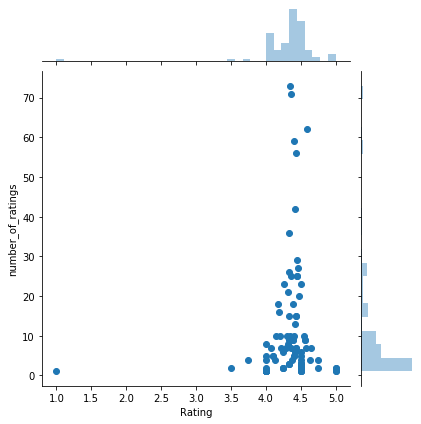

In [34]:
#Plotting the jointplot

sns.jointplot(x= 'Rating', y= 'number_of_ratings', data = ratings1)

joint plot that shows distributions of the atractions labels and ratings

# Train KNN model for item-based collaborative filering



*   Reshaping the Data
*   Fitting the Model




**1. Reshaping the Data**

For K-Nearest Neighbors, we want the data to be in an (Attraction, Label) array, where each row is an attraction label and each column is a different Attraction. To reshape the dataframe, we'll pivot the dataframe to the wide format with movies as rows and users as columns. Then we'll fill the missing observations with 0s since we're going to be performing linear algebra operations (calculating distances between vectors). Finally, we transform the values of the dataframe into a scipy sparse matrix for more efficient calculations

In [35]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


In [63]:
#Normalize the Ratings into a matrix 

attrac_mat = attrac_df.pivot_table(index='Attracid', columns='Label', values='Rating').fillna(0)/5.0
attrac_mat

Label,1359,Antique Stores,Aquariums,Architectural Buildings,Arenas & Stadiums,Art Galleries,Art Museums,Ballets,Bars & Clubs,Beaches,...,Theaters,Theme Parks,Tramways,Visitor Centers,Water Parks,Waterfalls,Wine Bars,Wineries & Vineyards,Yoga & Pilates,Zoos
Attracid,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.9,...,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:

# create mapper from Attraction title to index
attrac_to_idx = {
    attrac: i for i, attrac in 
    enumerate(list(attrac_df.set_index('Attracid').loc[attrac_mat.index].Attraction))
}
# transform matrix to scipy sparse matrix
attrac_user_mat_sparse = csr_matrix(attrac_mat.values)

**2. Fitting the Model**

Time to implement the model. We'll initialize the NearestNeighbors class as model_knn and fit our sparse matrix to the instance. By specifying the metric = cosine, the model will measure similarity bectween artist vectors by using cosine similarity.

In [38]:
# define model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
# fit
model_knn.fit(attrac_user_mat_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [39]:
attrac_to_idx

{'USS Midway Museum': 0,
 'Cave of the Winds': 1,
 'Wild Horse Renewable Energy Center': 2,
 'North Carolina Museum of Natural Sciences': 3,
 'La Jolla Cove': 4,
 'Niagara Falls': 5,
 'Iron Horse Brewery': 6,
 'North Carolina Museum of Art': 7,
 'San Diego Zoo': 8,
 'Niagara Falls State Park': 9,
 "Dick and Jane's Spot": 10,
 'Pullen Park': 11,
 'Mt. Soledad National Veterans Memorial': 12,
 'Niagara Falls Observation Tower': 13,
 'Irene Rhinehart Riverfront Park': 14,
 'Marbles Kids Museum': 15,
 'Balboa Park': 16,
 'Goat Island': 17,
 'Kittitas County Historical Museum': 18,
 'North Carolina Museum of History': 19,
 'La Jolla Shores Park': 20,
 'Bridal Veil Falls': 21,
 'Whipsaw Brewing': 22,
 'Umstead State Park': 23,
 'Torrey Pines Gliderport': 24,
 'Whirlpool State Park': 25,
 'Clymer Museum of Art': 26,
 'Historic Yates Mill County Park': 27,
 "Children's Pool": 28,
 'Niagara Gorge Trail': 29,
 'Umtanum Canyon Trail': 30,
 'JC Raulston Arboretum at NC State University': 31,
 'Sun

In [40]:
!pip install fuzzywuzzy

# utils import
from fuzzywuzzy import fuzz

In [61]:
def fuzzy_matching(mapper, fav_attrac, verbose=True):
    """
    return the closest match via fuzzy ratio. If no match found, return None
    
    Parameters
    ----------    
    mapper: dict, map Attraction title name to index of the movie in data

    fav_movie: str, name of user input label
    
    verbose: bool, print log if True

    Return
    ------
    index of the closest match
    """
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_attrac.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]



def make_recommendation(model_knn, data, mapper, fav_attrac, n_recommendations, type = None ):
    """
    return top n similar Attraction recommendations based on user's input


    Parameters
    ----------
    model_knn: sklearn model, knn model

    data:attrac-user matrix

    mapper: dict, map Attraction title name to index of the Attraction in data

    fav_movie: str, name of user input 

    n_recommendations: int, top n recommendations

    Return
    ------
    list of top n similar Attractions recommendations
    """
    # fit
    model_knn.fit(data)
    # get input attraction index
    print('You have input attraction:', fav_attrac)
    idx = fuzzy_matching(mapper, fav_attrac, verbose=True)
    # inference
    print('Recommendation system start to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    # get list of raw idx of recommendations
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_attrac))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

In [42]:
attrac_df.loc[attrac_df['Type'] == 'Romantic']

,Attracid,Address,Attraction,Label,Number_of_Reviews,Overview,Rank,Rating,Type,Unnamed: 8
306,0,25905 Vantage Hwy| Ellensburg| WA 98926-5088,Wild Horse Renewable Energy Center,Points of Interest & Landmarks,132.0,Due to the heightened level of caution regardi...,1,5.0,Romantic,NaN
307,1,416 N Main St| Ellensburg| WA 98926-3108,Iron Horse Brewery,Breweries,85.0,Iron Horse Brewery,2,5.0,Romantic,NaN
308,2,101 N Pearl St| Ellensburg| WA 98926-3324,Dick and Jane's Spot,Points of Interest & Landmarks,63.0,Dick and Jane's Spot,3,5.0,Romantic,NaN
309,3,Umptanum Road| Ellensburg| WA 98926,Irene Rhinehart Riverfront Park,Parks,13.0,Irene Rhinehart Riverfront Park,7,5.0,Romantic,NaN
310,4,114 E 3rd Ave| Ellensburg| WA 98926-3346,Kittitas County Historical Museum,Specialty Museums,43.0,Housed in the historic 1889 Cadwell Building| ...,4,4.5,Romantic,NaN
...,...,...,...,...,...,...,...,...,...,...
1097,642,412 S Cherry at Albemarle St| Richmond| VA,Hollywood Cemetery,Cemeteries,1390.0,Hollywood Cemetery,7,4.0,Romantic,NaN
1098,643,1201 E Clay St| Richmond| VA 23219-1615,White House of the Confederacy,Military Museums,1239.0,To ensure the health and safety of both visito...,14,4.5,Romantic,NaN
1101,644,Monument Avenue| Richmond| VA 23220,Monument Avenue,Points of Interest & Landmarks,948.0,Monument Avenue,19,4.0,Romantic,NaN
1102,645,2500 W Broad St| Richmond| VA 23220-2057,Science Museum of Virginia,Science Museums,437.0,We're not your dad's Science Museum! says Scie...,16,4.5,Romantic,NaN


In [43]:
my_favorite = 'Garden and Glass'

make_recommendation(
    model_knn=model_knn,
    data=attrac_user_mat_sparse,
    fav_attrac=my_favorite,
    mapper=attrac_to_idx,
    n_recommendations=20)

You have input attraction: Garden and Glass
Found possible matches in our database: ['Chihuly Garden and Glass']

Recommendation system start to make inference
......

Recommendations for Garden and Glass:
1: Paul and Lulu Hilliard University Art Museum, with distance of 0.5491651826662838
2: Moxie Falls, with distance of 0.5491651826662838
3: Fountains of Bellagio, with distance of 0.54426728481235
4: Wednesday Wines on 3rd St, with distance of 0.42264973081037416
5: ZooWorld Zoological Conservatory, with distance of 0.42264973081037416
6: Mendocino Coast Model Railroad & Historical Society, with distance of 0.42264973081037416
7: Otis Johnson Park, with distance of 0.42264973081037416
8: Pedego Electric Bikes, with distance of 0.42264973081037416
9: The Metropolitan Museum of Art, with distance of 0.42264973081037416
10: Sarah P. Duke Gardens, with distance of 0.42264973081037416
11: Museum of Life + Science, with distance of 0.42264973081037416
12: Little Rock Central High School Na

### Overview Column (Content-based approach)


In [44]:
attrac_df['Overview']= attrac_df['Overview'].str.replace('|', ' ')

In [45]:
attrac_df['Overview'].head(10)

0     Located in downtown San Diego  the USS Midway ...
1     San Diego's most desirable spot for swimming  ...
3     The world famous San Diego Zoo is a non-profit...
4                Mt. Soledad National Veterans Memorial
7     One of the most popular urban parks in the Uni...
10    Mile-long beach features gentle waves during t...
12                              Torrey Pines Gliderport
13    It was supposed to be a children's pool  but t...
14                           Sunset Cliffs Natural Park
15    Birch Aquarium at Scripps is the public explor...
Name: Overview, dtype: object

Based on the description of the attractions we shall fin the similarity among the movies.

In [46]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

!nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [47]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


attrac_df['cleanText']=attrac_df['Overview'].map(lambda s:preprocess(s)) 

In [48]:
attrac_df

,Attracid,Address,Attraction,Label,Number_of_Reviews,Overview,Rank,Rating,Type,Unnamed: 8,cleanText
0,0,NaN,USS Midway Museum,Specialty Museums,NaN,Located in downtown San Diego the USS Midway ...,1,4.0,Bleisure,NaN,located downtown san diego uss midway museum a...
1,1,1100 Coast Blvd| La Jolla| San Diego| CA 92037...,La Jolla Cove,Beaches,13458.0,San Diego's most desirable spot for swimming ...,1,4.5,Bleisure,NaN,san diego desirable spot swimming diving snork...
3,2,2929 Zoo Drive Balboa Park| San Diego| CA 92101,San Diego Zoo,Zoos,27747.0,The world famous San Diego Zoo is a non-profit...,4,4.5,Bleisure,NaN,world famous san diego zoo non profit wildlife...
4,3,6905 La Jolla Scenic Drive South| La Jolla| Sa...,Mt. Soledad National Veterans Memorial,Historic Sites,2448.0,Mt. Soledad National Veterans Memorial,2,4.0,Bleisure,NaN,soledad national veterans memorial
7,4,1549 El Prado| San Diego| CA 92101-1660,Balboa Park,Parks,12855.0,One of the most popular urban parks in the Uni...,3,4.5,Bleisure,NaN,one popular urban parks united states bucolic ...
...,...,...,...,...,...,...,...,...,...,...,...
1442,254,97 Haywood St| Asheville| NC 28801-2852,Basilica of Saint Lawrence,Churches & Cathedrals,1184.0,Basilica of Saint Lawrence,11,4.5,Weekend Getaway,NaN,basilica saint lawrence
1443,255,81 S Lexington Ave| Asheville| NC 28801-3309,Lexington Glassworks,Art Galleries,944.0,Lexington Glassworks located in the heart of ...,6,4.5,Weekend Getaway,NaN,lexington glassworks located heart downtown as...
1444,256,Milepost 382 Blue Ridge Parkway Southern Highl...,The Folk Art Center (Southern Highland Craft G...,Specialty Museums,1357.0,Traditional and contemporary Southern Appalach...,9,4.5,Weekend Getaway,NaN,traditional contemporary southern appalachian ...
1446,257,75 Gashes Creek Rd| Asheville| NC 28805-2529,Western North Carolina Nature Center,Zoos,760.0,Visit the Western North Carolina Nature Center...,18,4.5,Weekend Getaway,NaN,visit western north carolina nature center hom...


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()

#Replace NaN with an empty string
attrac_df['cleanText'] = attrac_df['cleanText'].fillna('')
attrac_df['Overview'] = attrac_df['Overview'].fillna('')


#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(attrac_df['Overview'])
sparse_matrix = count_vectorizer.fit_transform(attrac_df['cleanText'])


#Output the shape of tfidf_matrix
tfidf_matrix.shape
sparse_matrix.shape

(1081, 4115)

In [52]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index= attrac_df.index.tolist())

In [53]:
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,4323,4324,4325,4326,4327,4328,4329,4330,4331,4332
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.163727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183638,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232067,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1443,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1444,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1446,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [54]:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index= attrac_df['Attracid'])
df

,aaca,abc,abiding,abilities,ability,aboard,abound,abounds,abq,abstract,...,youngberg,youth,yuba,zane,zinfandel,zip,zone,zoo,zoological,zoos
Attracid,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


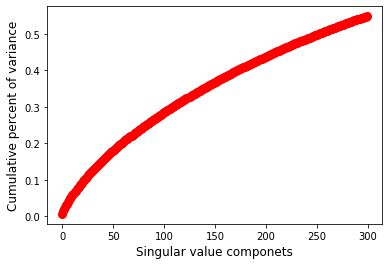

In [55]:
#Compress with SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 300)
latent_matrix = svd.fit_transform(tfidf_df)

#plot var explained to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms =16, color = 'red')
plt.xlabel('Singular value componets', fontsize =12)
plt.ylabel('Cumulative percent of variance', fontsize =12)
plt.show()

In [56]:
#number of latent dimensions to keep 
n = 300
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index = attrac_df.index.tolist())

In [57]:
#our content latent matrix:
latent_matrix.shape

(1081, 300)

In [58]:
latent_matrix

array([[ 9.72611638e-02,  1.93628237e-01, -1.14127116e-01, ...,
        -2.88312956e-02,  3.12188995e-02,  1.88380763e-03],
       [ 5.54104331e-02,  4.23301045e-02,  1.08573645e-02, ...,
         5.03254095e-02, -3.11696450e-03, -2.44697442e-02],
       [ 7.70331378e-02,  7.67591478e-02,  9.15596798e-04, ...,
        -2.33464647e-03, -2.00676520e-02,  2.35479386e-05],
       ...,
       [ 7.93945140e-02,  1.57919519e-01,  6.61928150e-02, ...,
        -2.59750411e-02, -9.40212195e-03,  5.59183953e-03],
       [ 1.28718437e-01,  1.37434972e-01,  1.77019051e-01, ...,
        -1.55326724e-02, -1.35611761e-03,  1.99247978e-03],
       [ 1.30585176e-01,  4.40153621e-02, -4.46810217e-02, ...,
        -3.52955519e-02, -1.82011487e-02,  9.20094089e-02]])

In [59]:
# define model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5, n_jobs=-1)
# fit
model_knn.fit(sparse_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=5, p=2, radius=1.0)

In [60]:
my_favorite = 'Garden and Glass'

make_recommendation(
    model_knn=model_knn,
    data=sparse_matrix,
    fav_attrac=my_favorite,
    mapper=attrac_to_idx,
    n_recommendations=20)

You have input attraction: Garden and Glass
Found possible matches in our database: ['Chihuly Garden and Glass']

Recommendation system start to make inference
......

Recommendations for Garden and Glass:
1: Eyrie Vineyards, with distance of 0.871435130693355
2: The Museum of Flight, with distance of 0.871435130693355
3: Mission San Buenaventura, with distance of 0.8694417580332265
4: Gracianna Winery, with distance of 0.8666337326576838
5: Wild Goose Casino, with distance of 0.8666337326576838
6: The Getty Center, with distance of 0.8651600275073517
7: Elevation Sports, with distance of 0.8598000725534437
8: The Kitchen Shoppe Cooking School, with distance of 0.8598000725534437
9: U.S. Space and Rocket Center, with distance of 0.8578661890962598
10: Mendo Insider Tours, with distance of 0.8492443277111182
11: Universal Studios Florida, with distance of 0.8492443277111182
12: Silver Queen Gondola, with distance of 0.8492443277111182
13: Von Braun Astronomical Society, with distance of

The content based approched recommendation score was determined but the description of the diffrent attractions. Notice we have a higher scores vs when using the collaborative approach. Based on the content, has the model has captured that theses are similar attractions 

# Conclusion

The project's aim was to provide a tailor-made travel itinerary for users based on thier travel preferences. The aim of the project was successfully accomplished by using various Data Science tools and techniques. Using the Content based filltering approach yeilded better results rather than the collaborative filtering approach. 

While the accuracy of this recomendation system is subjective, we would have to put this model out to do some A/B testing to validate its performance. 


**Things we accomplished successfully:**



1.   Use selenium webdriver to webscrape Tripadvisor website.
2.   Build a Recomendation Model using KNN algorithim
3.   Use some NLP techquines to help improve the model.




---


**1. Use selenium webdriver ro webscrape Tripadvisor website.**



> This came with some challenges as the webpage kept dynamically changing. Most of the prep work went into documenting the new popups and ADs that would occur. Also certaing tags would change name and positions so that was something that also became an issue. Since we were iterating through a list of cities the webdriver did perform the webscrapping task quiet slowly. Hopefully next time we can use a REST api to beable to call the data from the database much more quickly.

**2. Build a Recomendation Model using KNN algorithm**


> We created KNN model that is close to our given input by using 'Cosine Similarity". We go for cosine over euclidean because the semantics will be better captured by usinf cosine similarity(euclidean will caluculate the mare diffrence in letters of the words. The final recommendations list is a weighted average of the recommendations obtained from the content-based technique.

**3. Use some NLP techniques to help improve the model**

>Tf-idf Vectorizer versus the Countvectorizer had an impact on how the model performed in the end. Both sufferd by the curse of dimensionality but they help to eleminate the cold start problem most recomendation systems run into.













# Future Work

* One idea to further improve our movie recommender system is to blend this new list of attraction recommendations with the previous list from KNN recommender. We basically implement a hybrid recommender system and this hybrid recommender can offer both popular and less-know content to users.

* The data was scraped from tripadvisor website . There are several other website that can contain more relevant travel information on the items and hence can be be used for better predictions.

* Incorporate a time series model to also predict flight prices and "best" times to purchase a flight.

* The recommendations provided can also be improved by taking into account the number (solo or a group), type and we can eliminate under 18 recomendations and empahsize on sugesting kid friendly places. 